<a href="https://colab.research.google.com/github/Naushad13b/AirPassengersForecasting/blob/main/1)AirPassengersForecastingUsingProphetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [41]:
url = "/content/AirPassengers.csv"
df = pd.read_csv(url)

In [42]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']

In [43]:
df.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [44]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [45]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=12 * 2, freq='M')
future.tail()

,ds
163,1962-07-31
164,1962-08-31
165,1962-09-30
166,1962-10-31
167,1962-11-30


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
163,1962-07-31,611.846269,582.071676,643.152675,545.349919,544.034669,546.579027
164,1962-08-31,565.983278,534.308202,593.468443,548.463862,547.015648,549.777875
165,1962-09-30,528.863822,501.883657,558.114443,551.477355,549.928611,552.866495
166,1962-10-31,499.753155,469.814600,528.879906,554.591298,552.944822,556.084729
167,1962-11-30,529.259123,499.740399,558.092179,557.604791,555.825408,559.186276


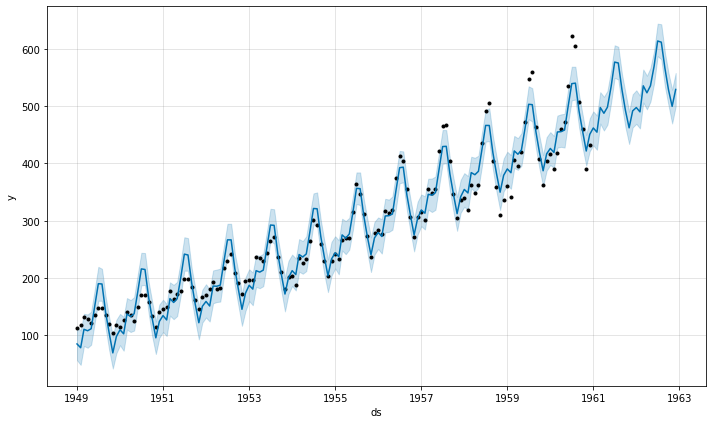

In [48]:
fig1 = m.plot(forecast)

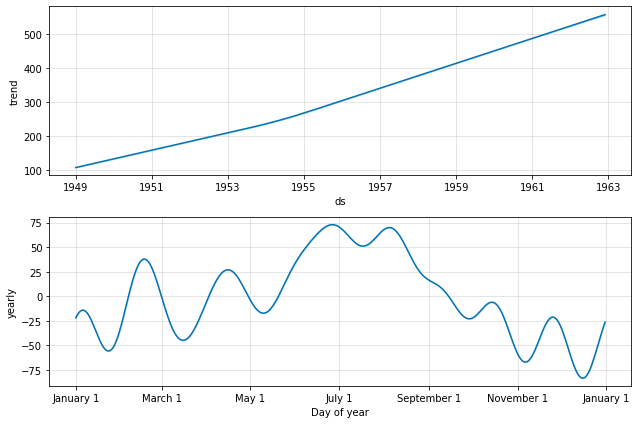

In [49]:
fig2 = m.plot_components(forecast)

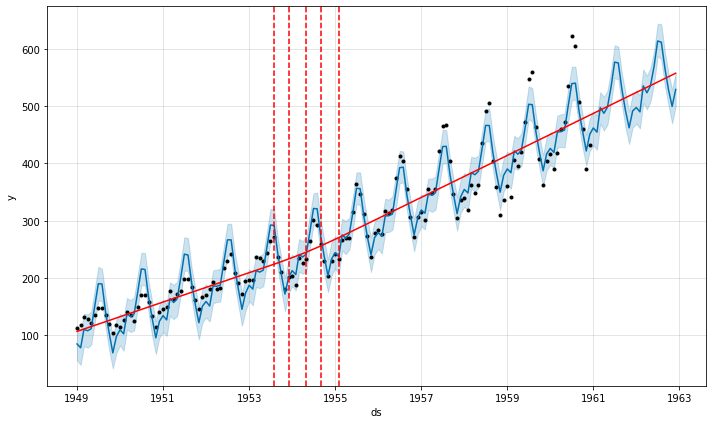

In [50]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)